# IMOVE Time-Series and Big-Data Workshop
In this workshop we will use the time-series functionality of [Pandas](https://pandas.pydata.org/docs/) and [Xarray](http://xarray.pydata.org/en/stable/) to explore some data collected by the [Ocean Observatories Intiative](https://oceanobservatories.org/). Hopefully we will also get a chance to explore [Dask](https://docs.dask.org/en/latest/) and [Dask Delayed](https://docs.dask.org/en/latest/delayed.html) functions to parallelize a data analysis workflow in the cloud. We will be working on the [OOICloud](https://www.ooicloud.org/) [Pangeo](http://pangeo.io/) instance. Further information on using Python to analyze Earth science datasets can be found in the book [Earth and Environmental Data Science](https://earth-env-data-science.github.io/intro) which I have been using to teach Research Computing in the Earth Sciences this semester.

## Bottom pressure data at Axial Seamount
Here we find data using the new OOI Data Explorer and use Pandas [read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) and [time-series functionality](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) to plot a smoothed representation of the bottom pressure at Axial Seamount. 

### First import some required packages

In [1]:
import pandas as pd

In [2]:
pd.__version__

'1.1.3'

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (14,8)

In [4]:
from IPython import display
display.set_matplotlib_formats('retina')

### Next find some data on the OOI Data Explorer

Link to new OOI Data Explorer: https://dataexplorer.oceanobservatories.org/

In [5]:
url = 'http://erddap.dataexplorer.oceanobservatories.org/erddap/tabledap/ooi-rs03ccal-mj03f-05-botpta301.csv?time%2Cbotpres%2Cbotpres_qc_agg%2Cz&time%3E%3D2014-08-29T20%3A59%3A00Z&time%3C%3D2020-11-21T06%3A00%3A00Z'

In [6]:
url

'http://erddap.dataexplorer.oceanobservatories.org/erddap/tabledap/ooi-rs03ccal-mj03f-05-botpta301.csv?time%2Cbotpres%2Cbotpres_qc_agg%2Cz&time%3E%3D2014-08-29T20%3A59%3A00Z&time%3C%3D2020-11-21T06%3A00%3A00Z'

In [7]:
botpt = pd.read_csv(url, parse_dates=True, usecols=['time', 'botpres'], index_col='time', skiprows=[1])

In [8]:
botpt.head()

,botpres
time,
2014-08-29 20:59:00+00:00,2255.105225
2014-08-29 21:00:00+00:00,2255.101685
2014-08-29 21:01:00+00:00,2255.102539
2014-08-29 21:02:00+00:00,2255.106018
2014-08-29 21:03:00+00:00,2255.116577


In [9]:
len(botpt)

3153978

In [10]:
botpt = botpt.rename(columns={'botpres': 'pressure'})

In [11]:
botpt.head()

,pressure
time,
2014-08-29 20:59:00+00:00,2255.105225
2014-08-29 21:00:00+00:00,2255.101685
2014-08-29 21:01:00+00:00,2255.102539
2014-08-29 21:02:00+00:00,2255.106018
2014-08-29 21:03:00+00:00,2255.116577


<AxesSubplot:xlabel='time', ylabel='pressure'>

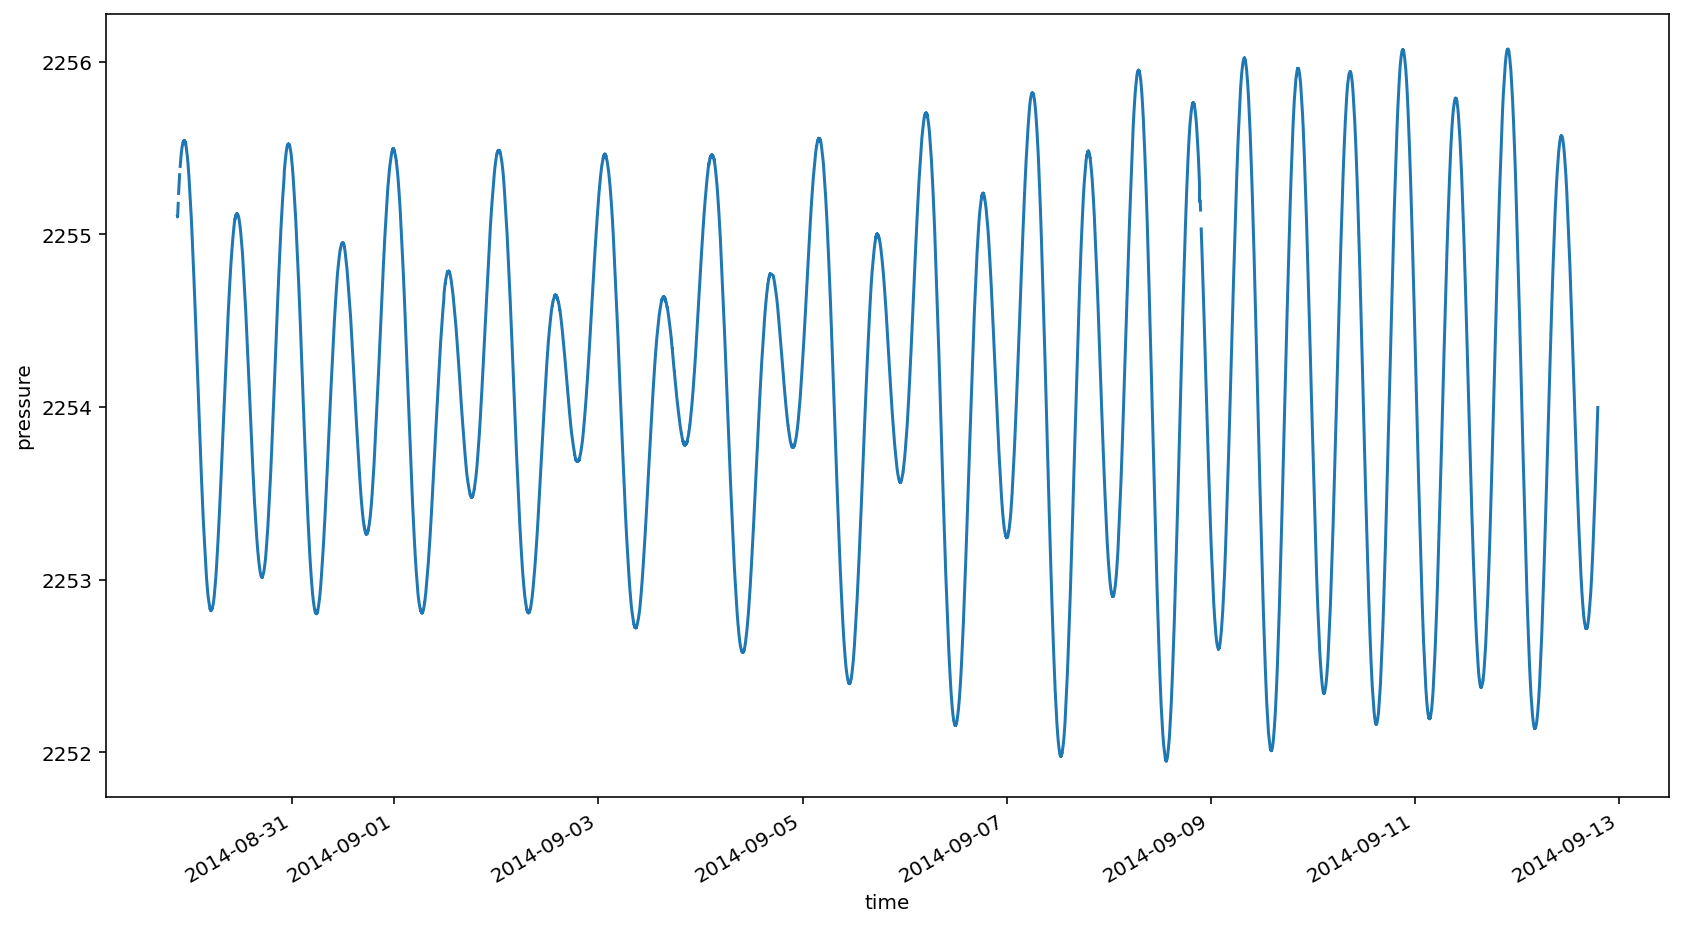

In [12]:
botpt[0:20000].pressure.plot(ylabel='pressure')

<AxesSubplot:xlabel='time'>

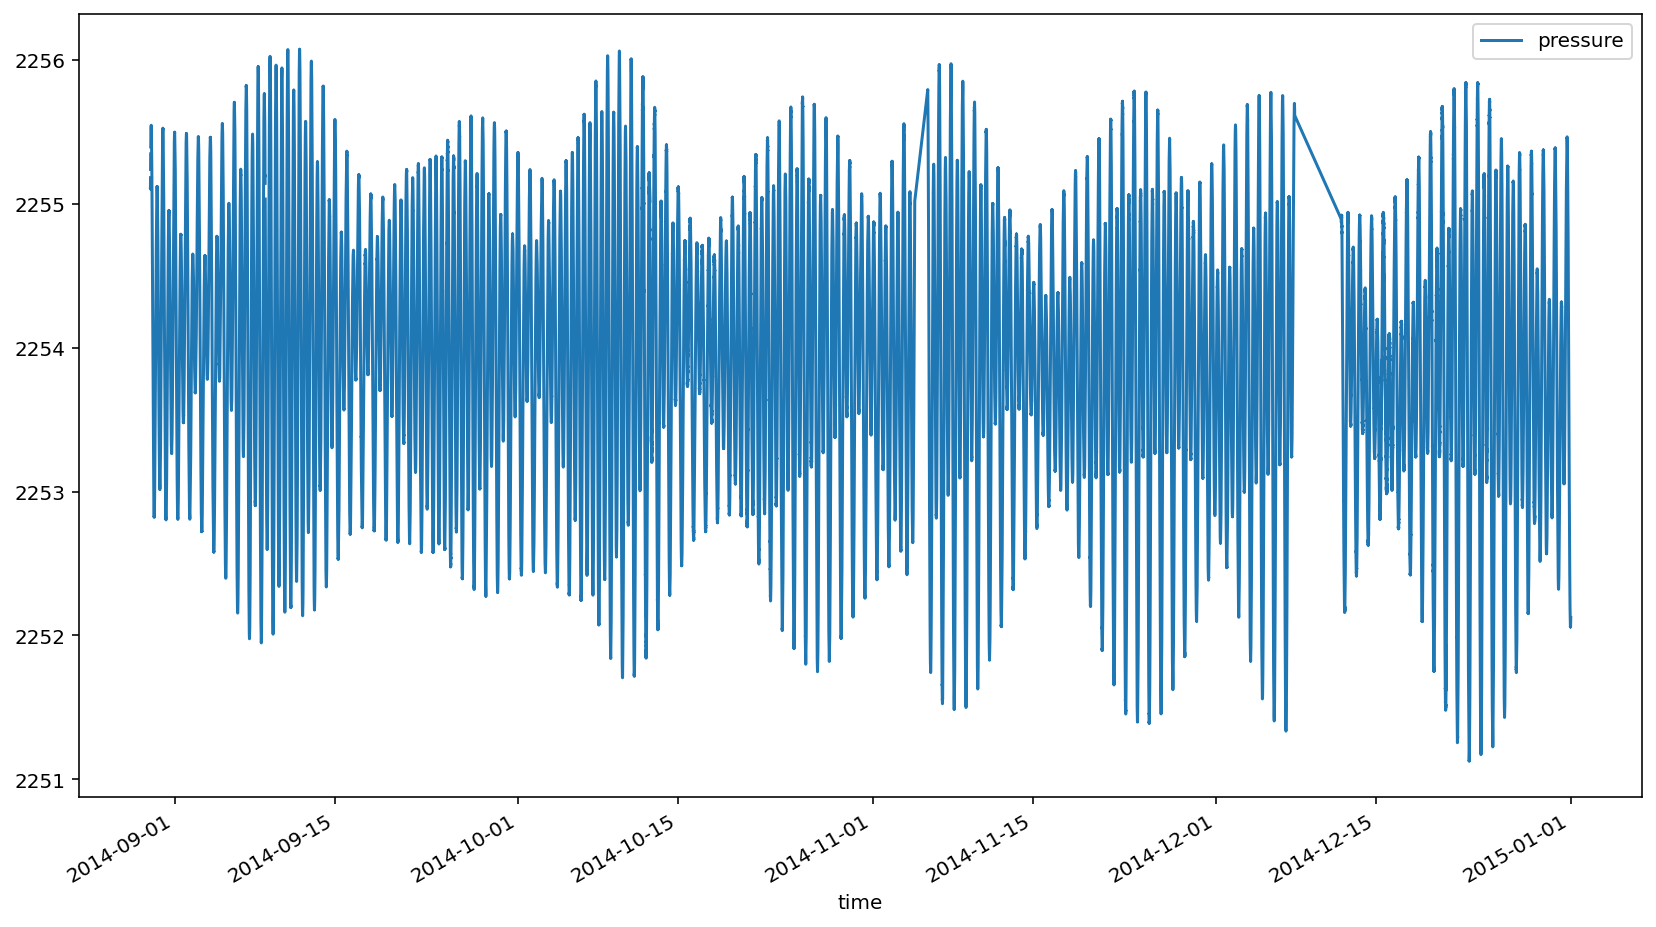

In [16]:
botpt['2014'].plot()

<AxesSubplot:xlabel='time'>

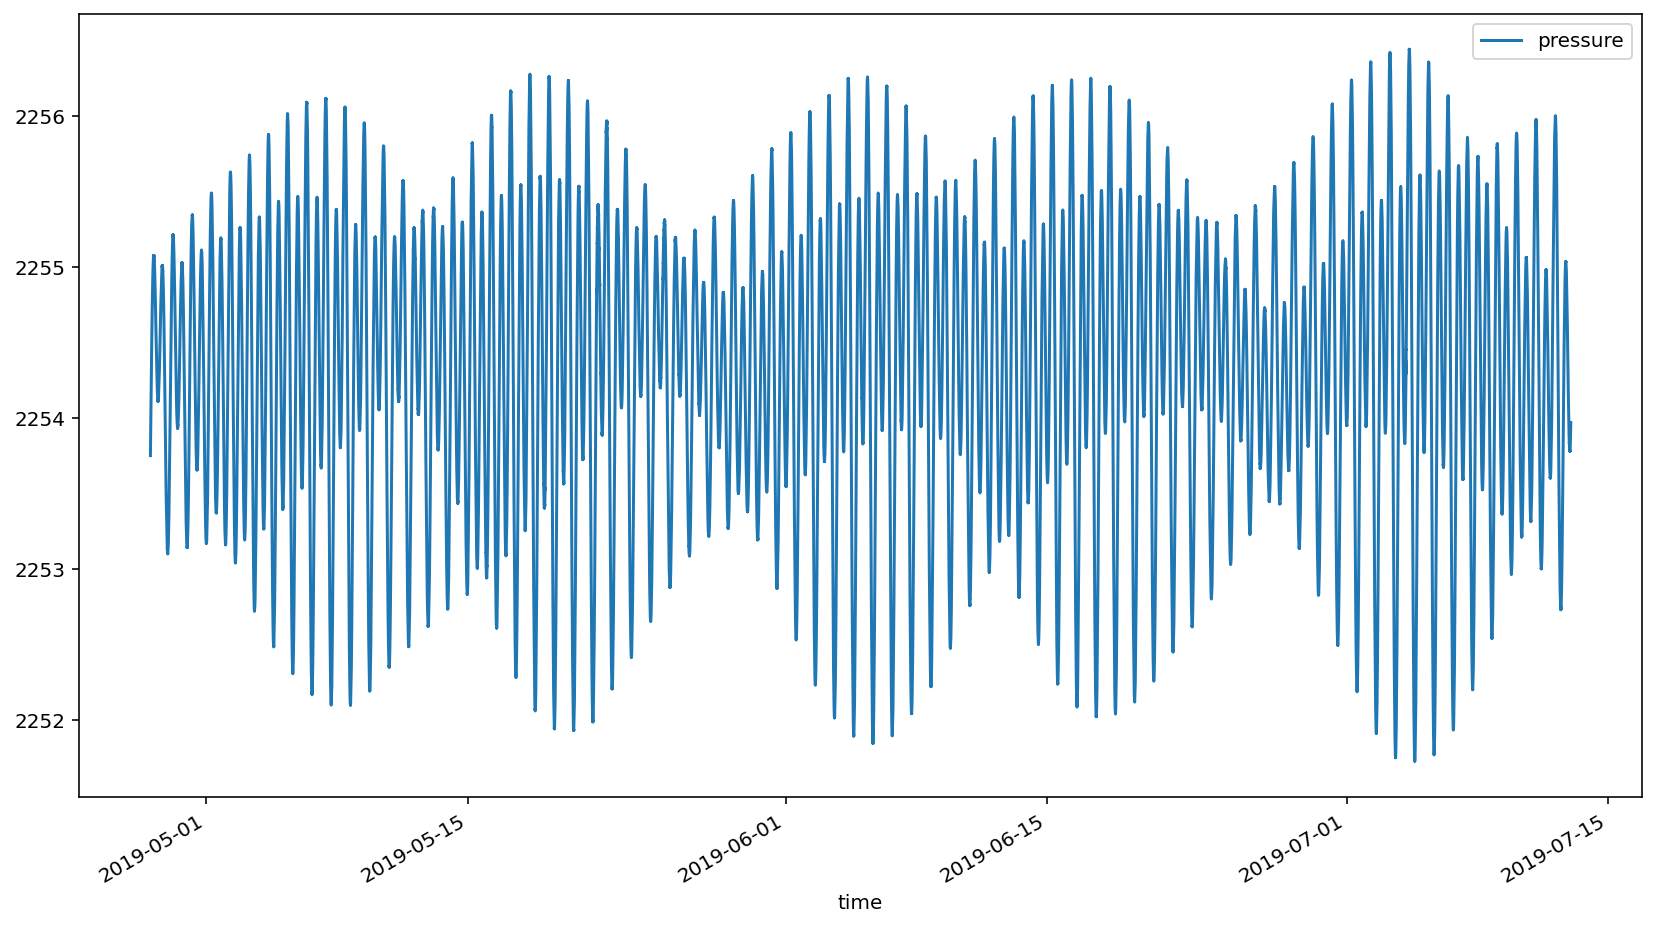

In [17]:
botpt['2019-04-28':'2019-7-12'].plot()

In [19]:
start = pd.Timestamp('2020-08')
start

Timestamp('2020-08-01 00:00:00')

<AxesSubplot:xlabel='time'>

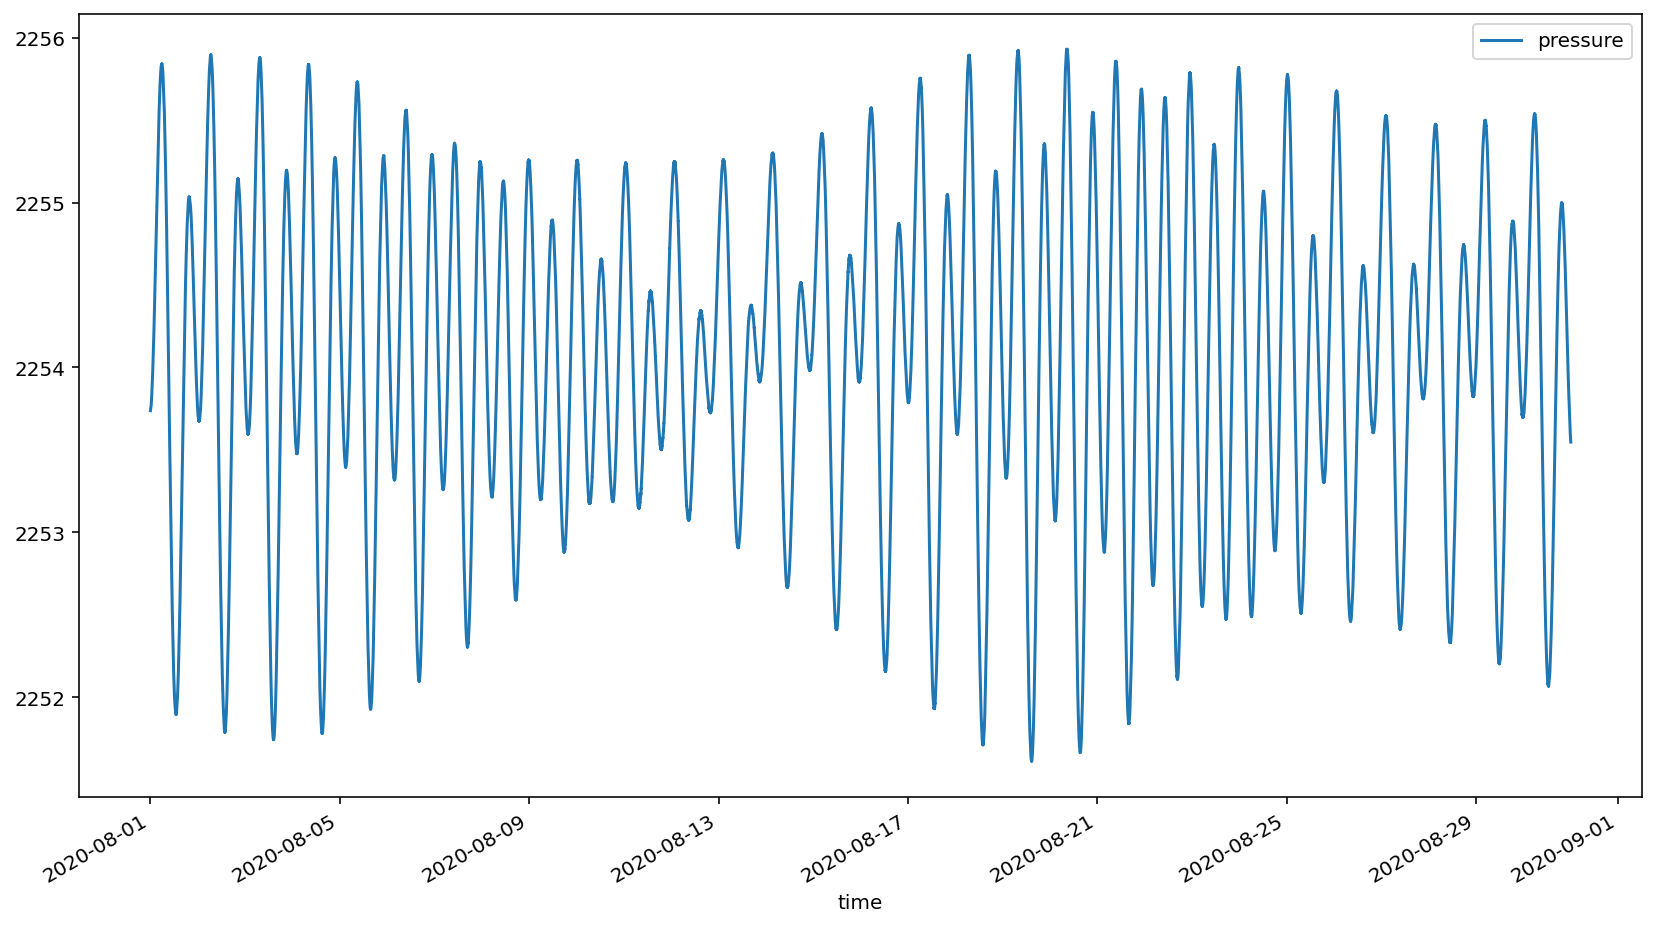

In [20]:
botpt[start:start+pd.Timedelta(days=30)].plot()

<AxesSubplot:xlabel='time'>

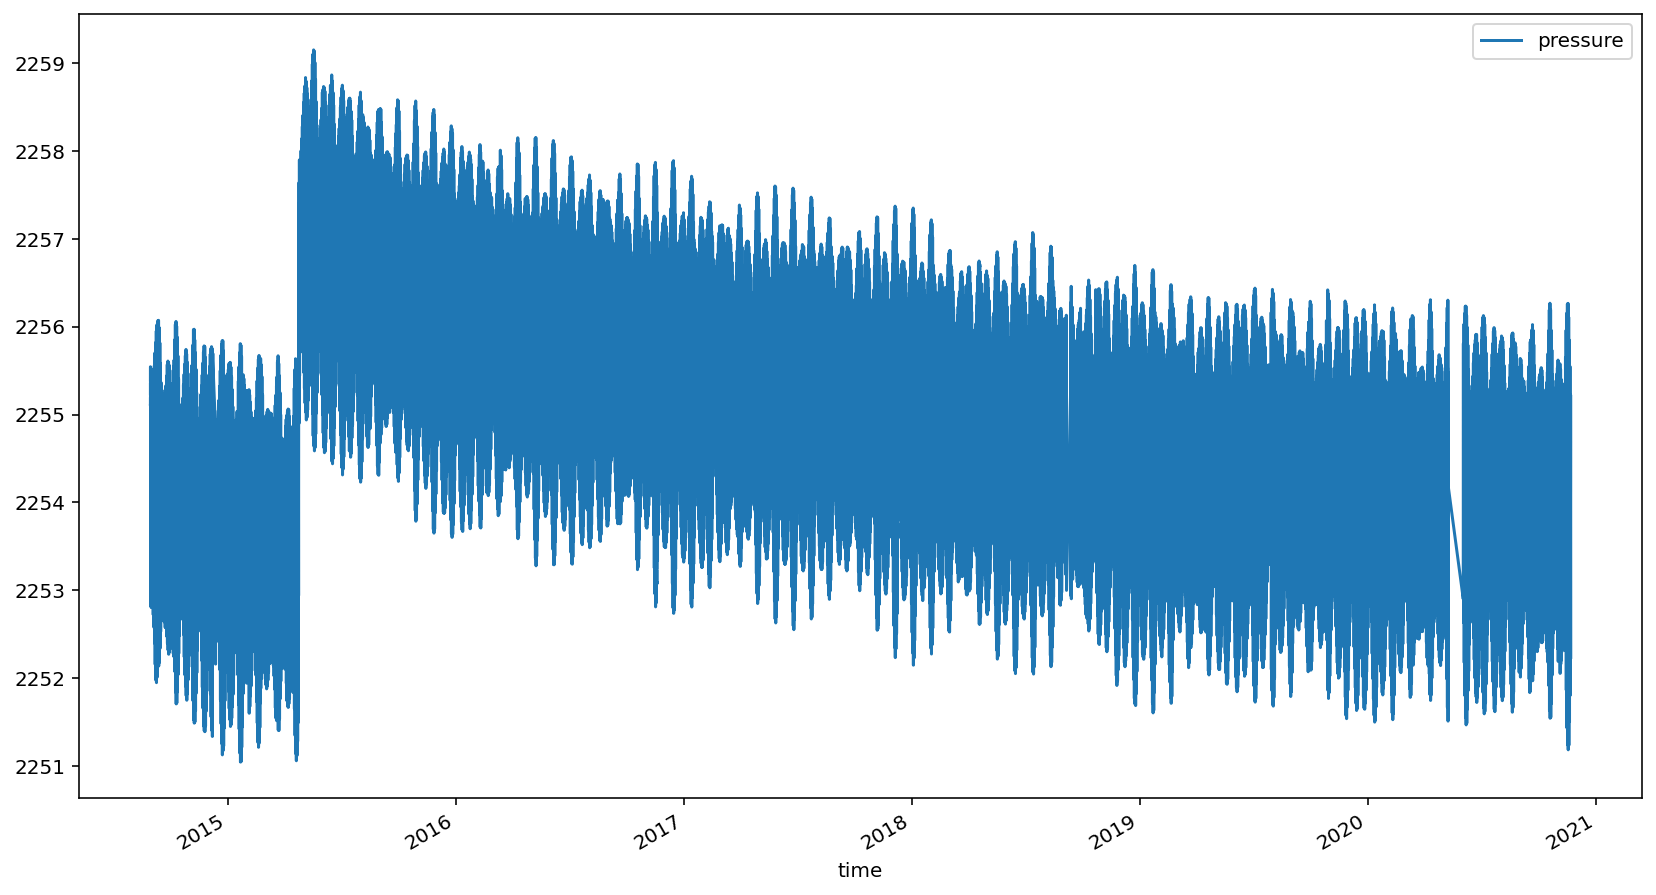

In [21]:
botpt.plot()

In [24]:
botpt_rolling = botpt.rolling('14D', min_periods=60*24*7).pressure.mean()

<AxesSubplot:xlabel='time', ylabel='pressure'>

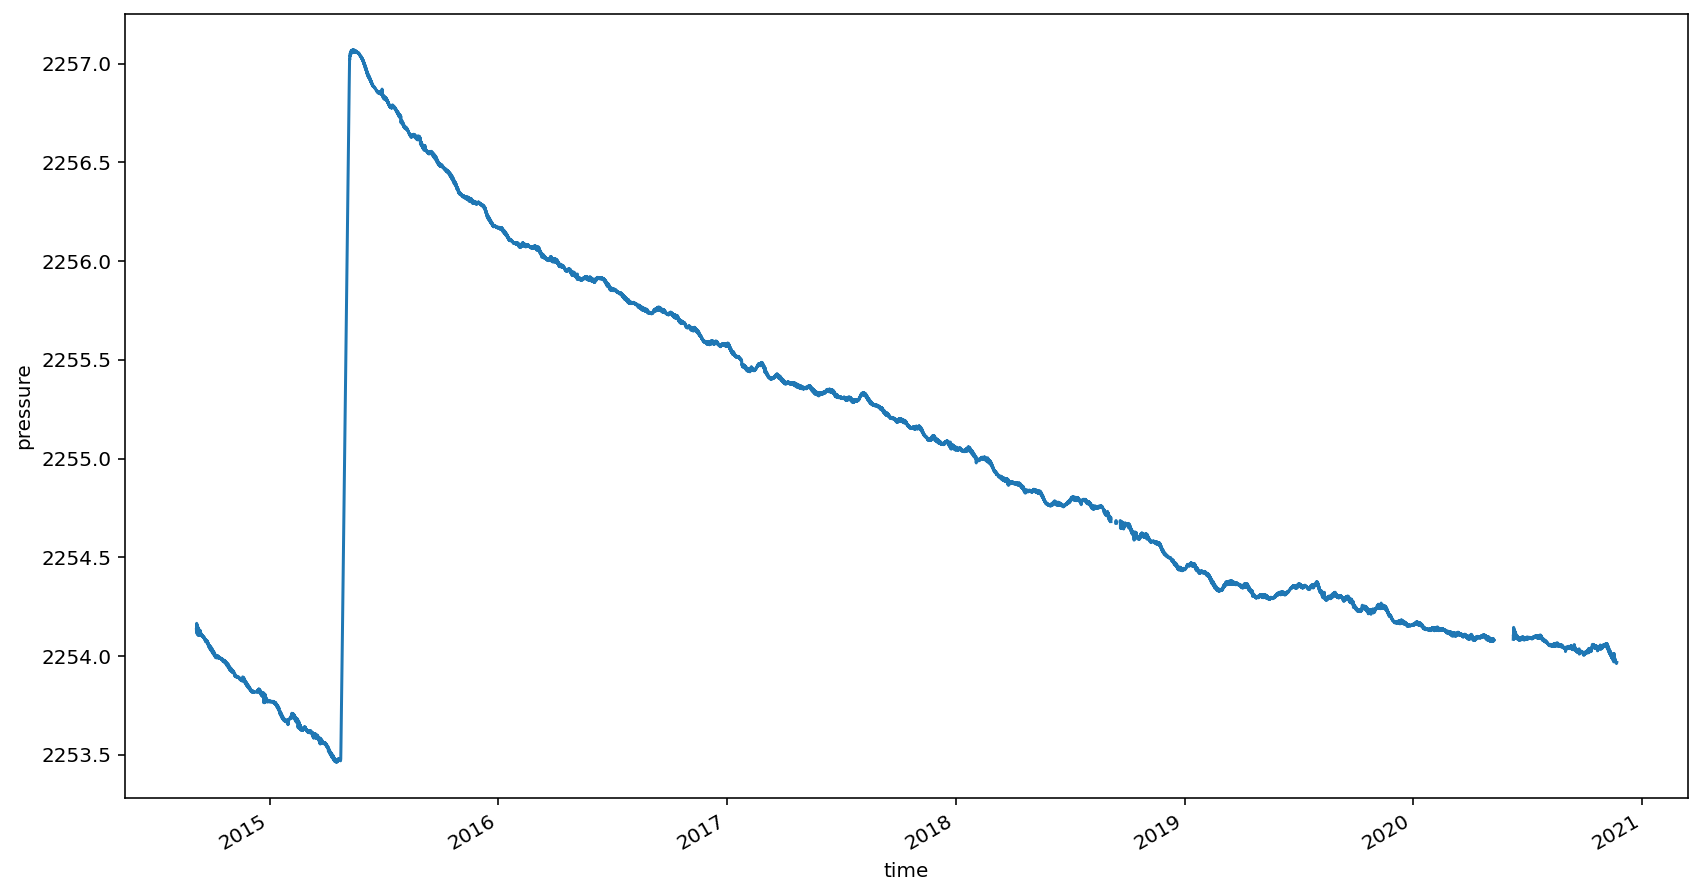

In [25]:
botpt_rolling.plot(ylabel='pressure')

In [31]:
bot

<bound method DataFrame.info of                               pressure
time                                  
2014-08-29 20:59:00+00:00  2255.105225
2014-08-29 21:00:00+00:00  2255.101685
2014-08-29 21:01:00+00:00  2255.102539
2014-08-29 21:02:00+00:00  2255.106018
2014-08-29 21:03:00+00:00  2255.116577
...                                ...
2020-11-21 05:43:00+00:00  2252.316406
2020-11-21 05:44:00+00:00  2252.310608
2020-11-21 05:45:00+00:00  2252.306030
2020-11-21 05:46:00+00:00  2252.298473
2020-11-21 06:00:00+00:00  2252.236084

[3153978 rows x 1 columns]>

## Earthquake catalog from the OOI seismic array at Axial Seamount
Here we parse and plot Axial Seamount earthquake catalog data from [William Wilcock's near-real-time automated earthquake location system](http://axial.ocean.washington.edu/). The data we will use is a text file in they HYPO71 output format located here: http://axial.ocean.washington.edu/hypo71.dat.

In [32]:
eqs_url = 'http://axial.ocean.washington.edu/hypo71.dat'

In [33]:
col_names = ['ymd', 'hm', 's', 'lat_deg', 'lat_min', 'lon_deg', 'lon_min',
        'depth', 'MW', 'NWR', 'GAP', 'DMIN',  'RMS',  'ERH', 'ERZ', 'ID', 'PMom', 'SMom']

In [34]:
eqs = pd.read_csv(eqs_url, sep = '\s+', header=0, names=col_names)

In [35]:
eqs.head()

,ymd,hm,s,lat_deg,lat_min,lon_deg,lon_min,depth,MW,NWR,GAP,DMIN,RMS,ERH,ERZ,ID,PMom,SMom
0,20150122,0,27.54,45,56.81,129,59.92,0.55,-0.31,7,206,1.2,0.03,0.8,0.4,20830,3.800000e+17,3.900000e+17
1,20150122,8,58.89,45,56.96,129,59.70,0.00,0.02,10,149,1.2,0.09,0.2,0.2,20831,1.900000e+18,7.800000e+17
2,20150122,202,41.04,45,56.47,130,0.89,0.67,-0.03,12,200,0.8,0.03,0.9,0.7,20836,1.400000e+18,7.200000e+17
3,20150122,219,56.90,45,54.93,129,57.59,1.60,0.26,7,325,1.8,0.06,1.4,2.5,20837,3.300000e+18,2.200000e+18
4,20150122,236,7.08,45,56.80,129,59.71,0.51,-0.15,8,160,1.2,0.06,0.5,0.2,20840,6.700000e+17,6.800000e+17


In [36]:
from datetime import datetime
def parse_hypo_date(ymd, hm, s):
    hour = int(hm.zfill(4)[0:2])
    minute = int(hm.zfill(4)[2:])
    second = float(s)
    if second == 60:
        second = 0
        minute += 1
    if minute == 60:
        minute=0
        hour +=1
    eq_date_str = ('%s%02.0f%02.0f%05.2f' % (ymd, hour, minute, second))
    return datetime.strptime(eq_date_str, '%Y%m%d%H%M%S.%f')

In [37]:
eqs = pd.read_csv(eqs_url, sep = '\s+', header=0, names=col_names, parse_dates=[[0,1,2]],
                 date_parser=parse_hypo_date)

In [38]:
eqs.head()

,ymd_hm_s,lat_deg,lat_min,lon_deg,lon_min,depth,MW,NWR,GAP,DMIN,RMS,ERH,ERZ,ID,PMom,SMom
0,2015-01-22 00:00:27.540,45,56.81,129,59.92,0.55,-0.31,7,206,1.2,0.03,0.8,0.4,20830,3.800000e+17,3.900000e+17
1,2015-01-22 00:08:58.890,45,56.96,129,59.70,0.00,0.02,10,149,1.2,0.09,0.2,0.2,20831,1.900000e+18,7.800000e+17
2,2015-01-22 02:02:41.040,45,56.47,130,0.89,0.67,-0.03,12,200,0.8,0.03,0.9,0.7,20836,1.400000e+18,7.200000e+17
3,2015-01-22 02:19:56.900,45,54.93,129,57.59,1.60,0.26,7,325,1.8,0.06,1.4,2.5,20837,3.300000e+18,2.200000e+18
4,2015-01-22 02:36:07.080,45,56.80,129,59.71,0.51,-0.15,8,160,1.2,0.06,0.5,0.2,20840,6.700000e+17,6.800000e+17


In [41]:
eqs['lat'] = eqs.lat_deg+eqs.lat_min/60
eqs['lon'] = -(eqs.lon_deg+eqs.lon_min/60)

In [42]:
eqs.head()

,ymd_hm_s,lat_deg,lat_min,lon_deg,lon_min,depth,MW,NWR,GAP,DMIN,RMS,ERH,ERZ,ID,PMom,SMom,lat,lon
0,2015-01-22 00:00:27.540,45,56.81,129,59.92,0.55,-0.31,7,206,1.2,0.03,0.8,0.4,20830,3.800000e+17,3.900000e+17,45.946833,-129.998667
1,2015-01-22 00:08:58.890,45,56.96,129,59.70,0.00,0.02,10,149,1.2,0.09,0.2,0.2,20831,1.900000e+18,7.800000e+17,45.949333,-129.995000
2,2015-01-22 02:02:41.040,45,56.47,130,0.89,0.67,-0.03,12,200,0.8,0.03,0.9,0.7,20836,1.400000e+18,7.200000e+17,45.941167,-130.014833
3,2015-01-22 02:19:56.900,45,54.93,129,57.59,1.60,0.26,7,325,1.8,0.06,1.4,2.5,20837,3.300000e+18,2.200000e+18,45.915500,-129.959833
4,2015-01-22 02:36:07.080,45,56.80,129,59.71,0.51,-0.15,8,160,1.2,0.06,0.5,0.2,20840,6.700000e+17,6.800000e+17,45.946667,-129.995167


In [43]:
eqs.rename(columns={'ymd_hm_s':'time', 'MW':'mw'}, inplace=True)

In [44]:
eqs.set_index('time', inplace = True)

In [51]:
eqs = eqs[['lat','lon','depth','mw']]

In [46]:
eqs.head()

,lat,lon,depth,mw
time,,,,
2015-01-22 00:00:27.540,45.946833,-129.998667,0.55,-0.31
2015-01-22 00:08:58.890,45.949333,-129.995000,0.00,0.02
2015-01-22 02:02:41.040,45.941167,-130.014833,0.67,-0.03
2015-01-22 02:19:56.900,45.915500,-129.959833,1.60,0.26
2015-01-22 02:36:07.080,45.946667,-129.995167,0.51,-0.15


In [70]:
type(eqs.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [47]:
len(eqs)

142134

<AxesSubplot:xlabel='time'>

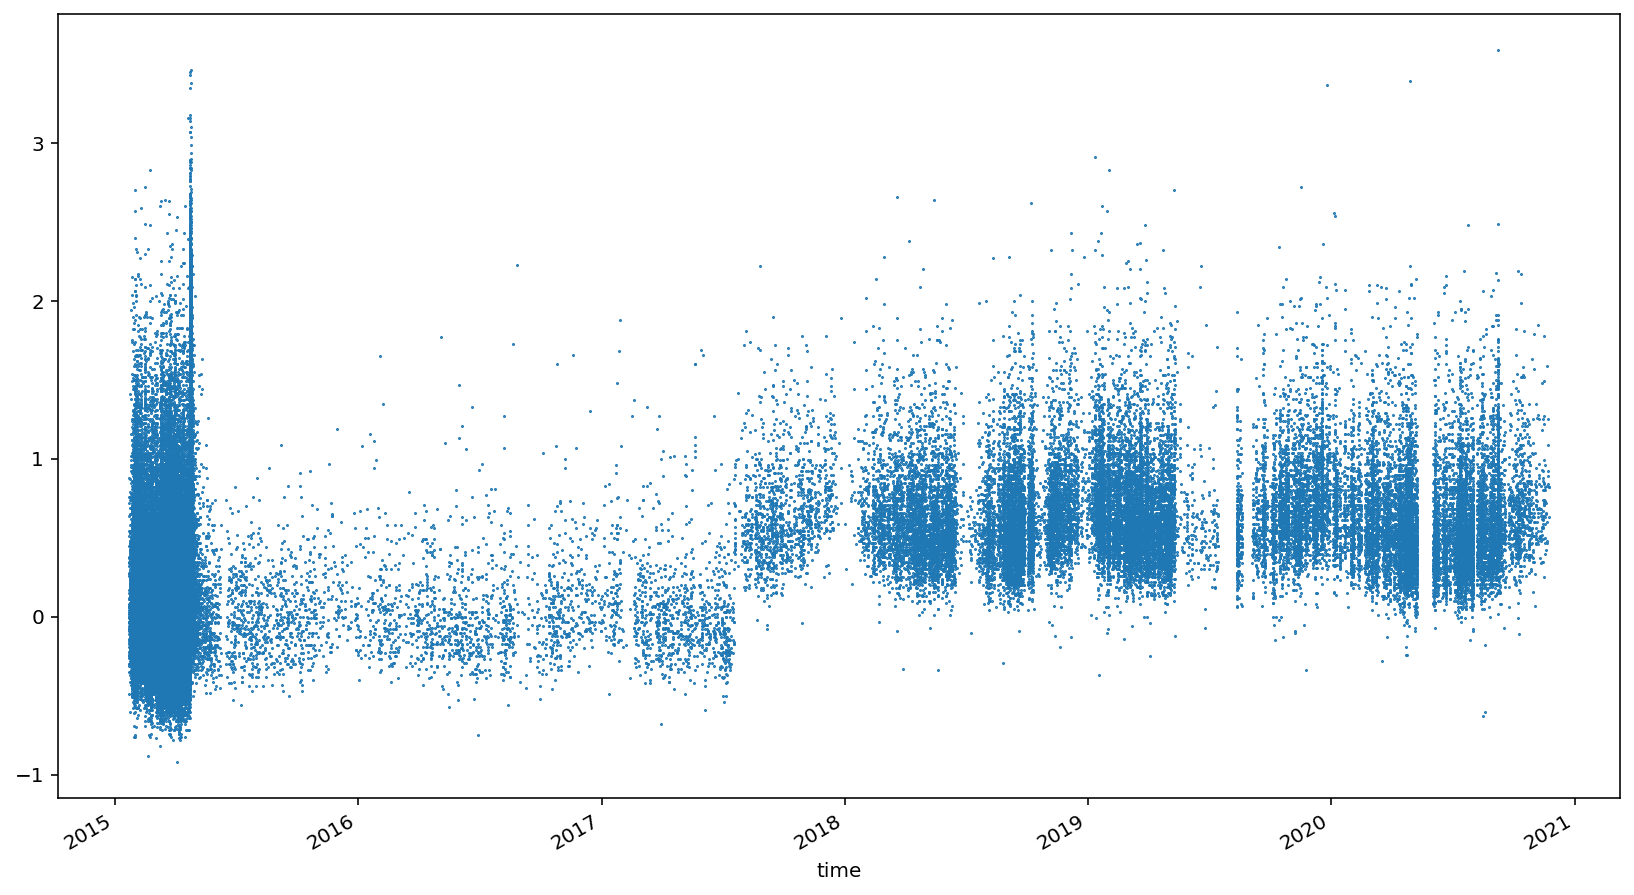

In [55]:
eqs.mw.plot(marker='.', linestyle='', markersize=1)

<AxesSubplot:xlabel='time'>

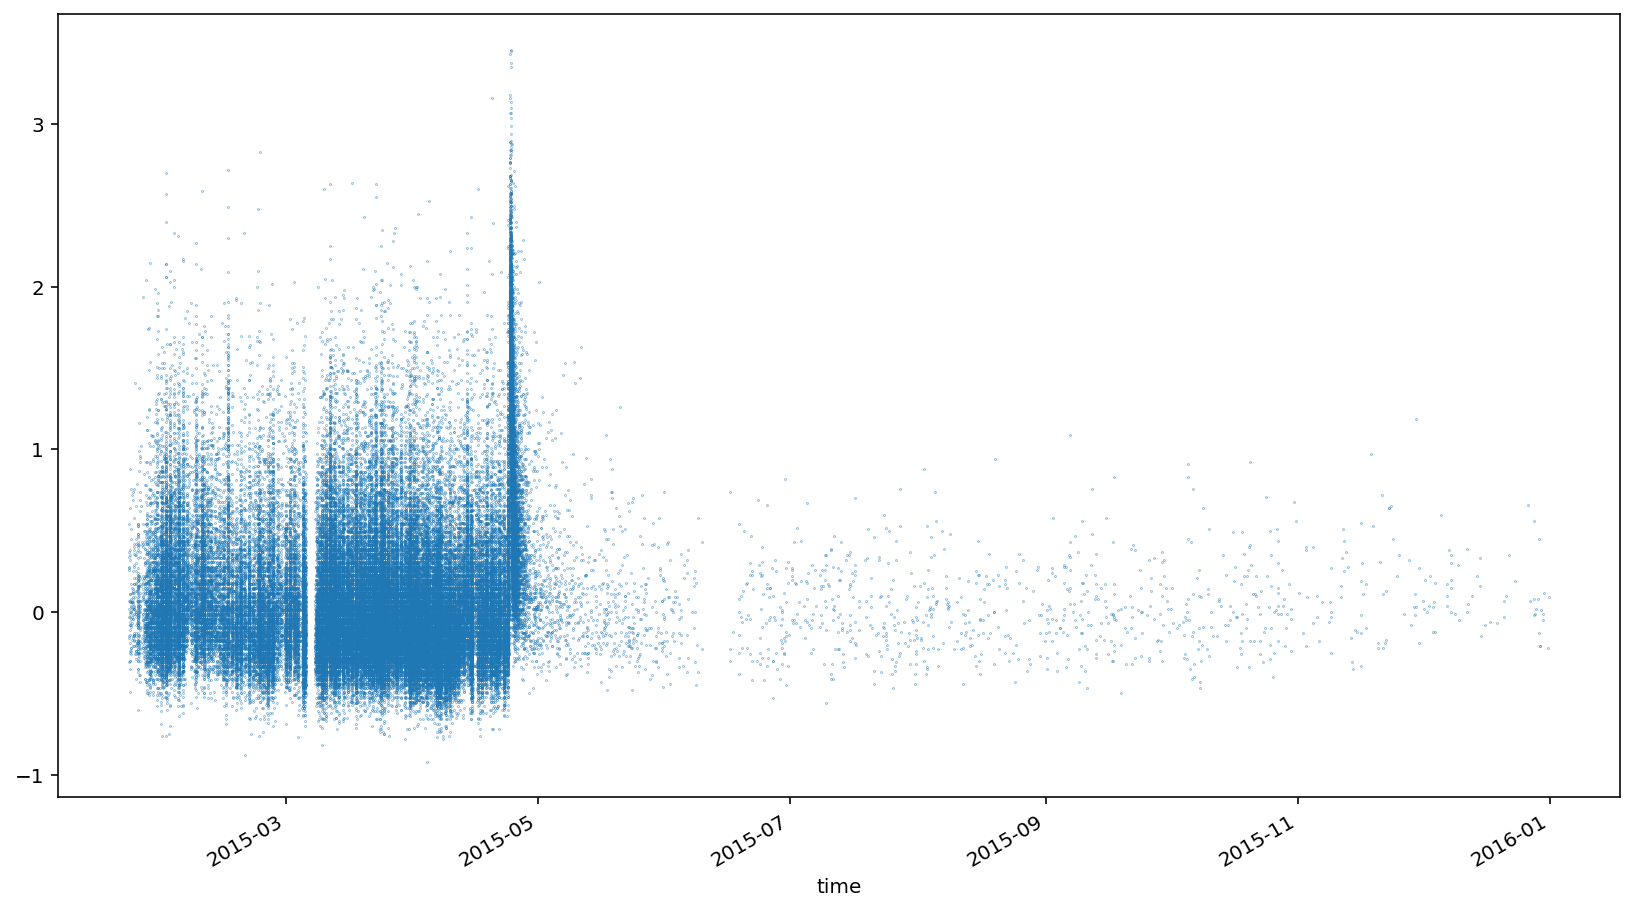

In [58]:
eqs['2015'].mw.plot(marker='.', linestyle='', markersize=0.4)

In [61]:
daily_count = eqs.mw.resample('1D').agg('count')

In [62]:
type(daily_count)

pandas.core.series.Series

In [67]:
daily_count.head()

time
2015-01-22     67
2015-01-23     72
2015-01-24    152
2015-01-25     99
2015-01-26    348
Freq: D, Name: mw, dtype: int64

(0.0, 2500.0)

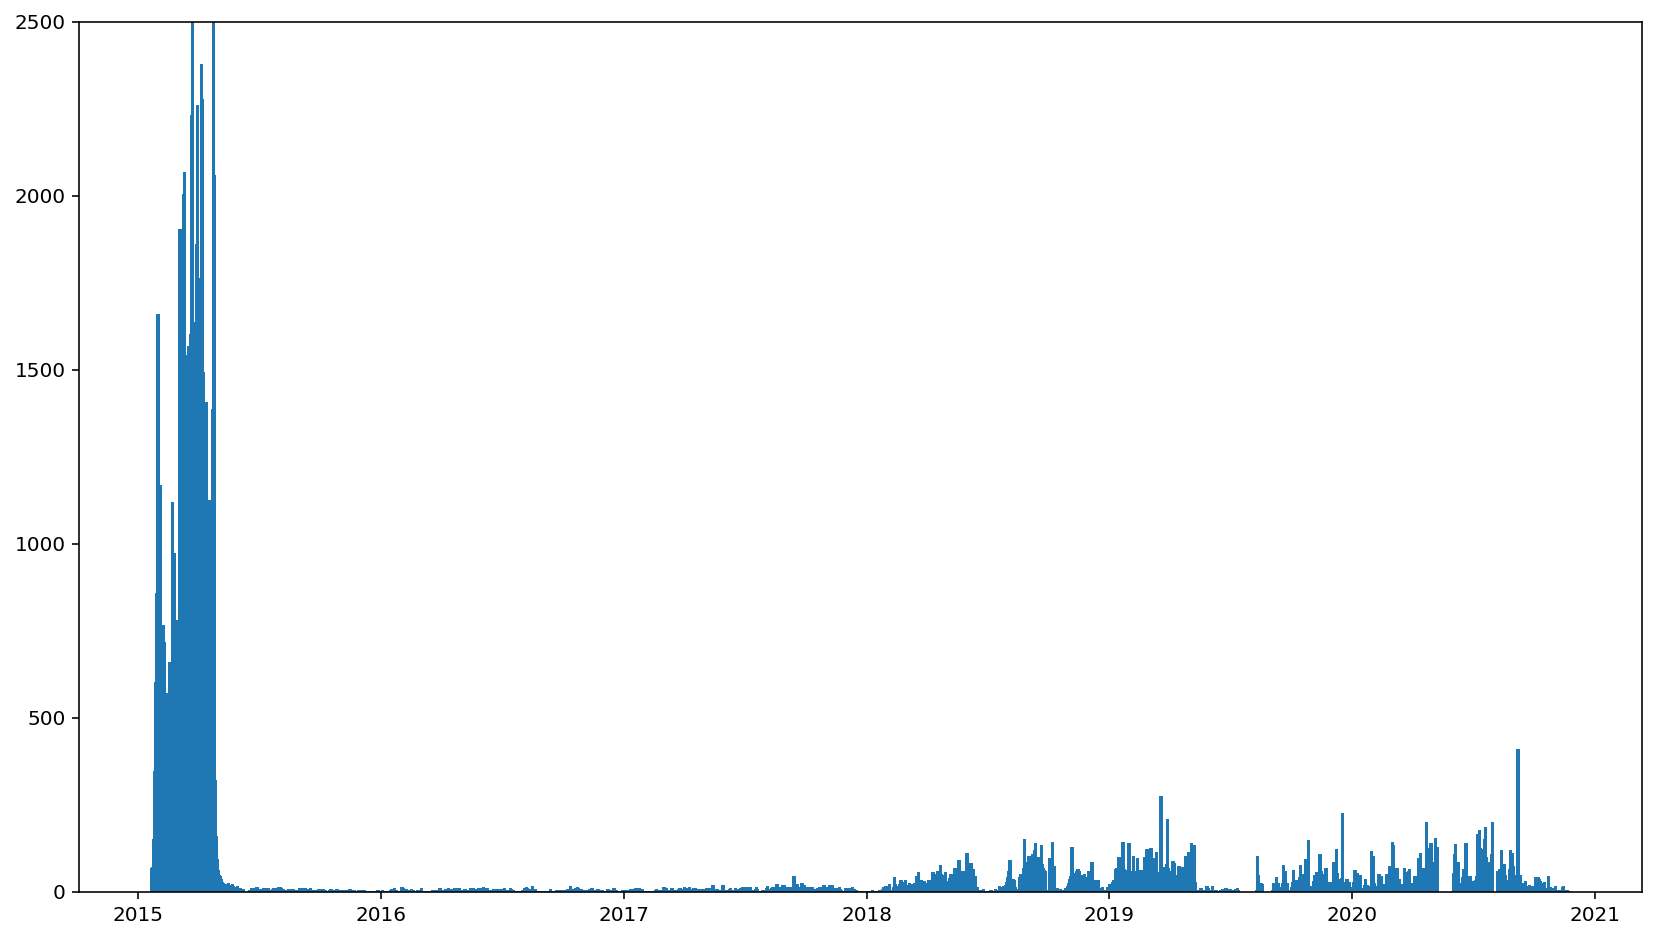

In [65]:
fig, ax1 = plt.subplots()
ax1.bar(daily_count.index, daily_count.values, width=5)
ax1.set_ylim(ymax=2500)

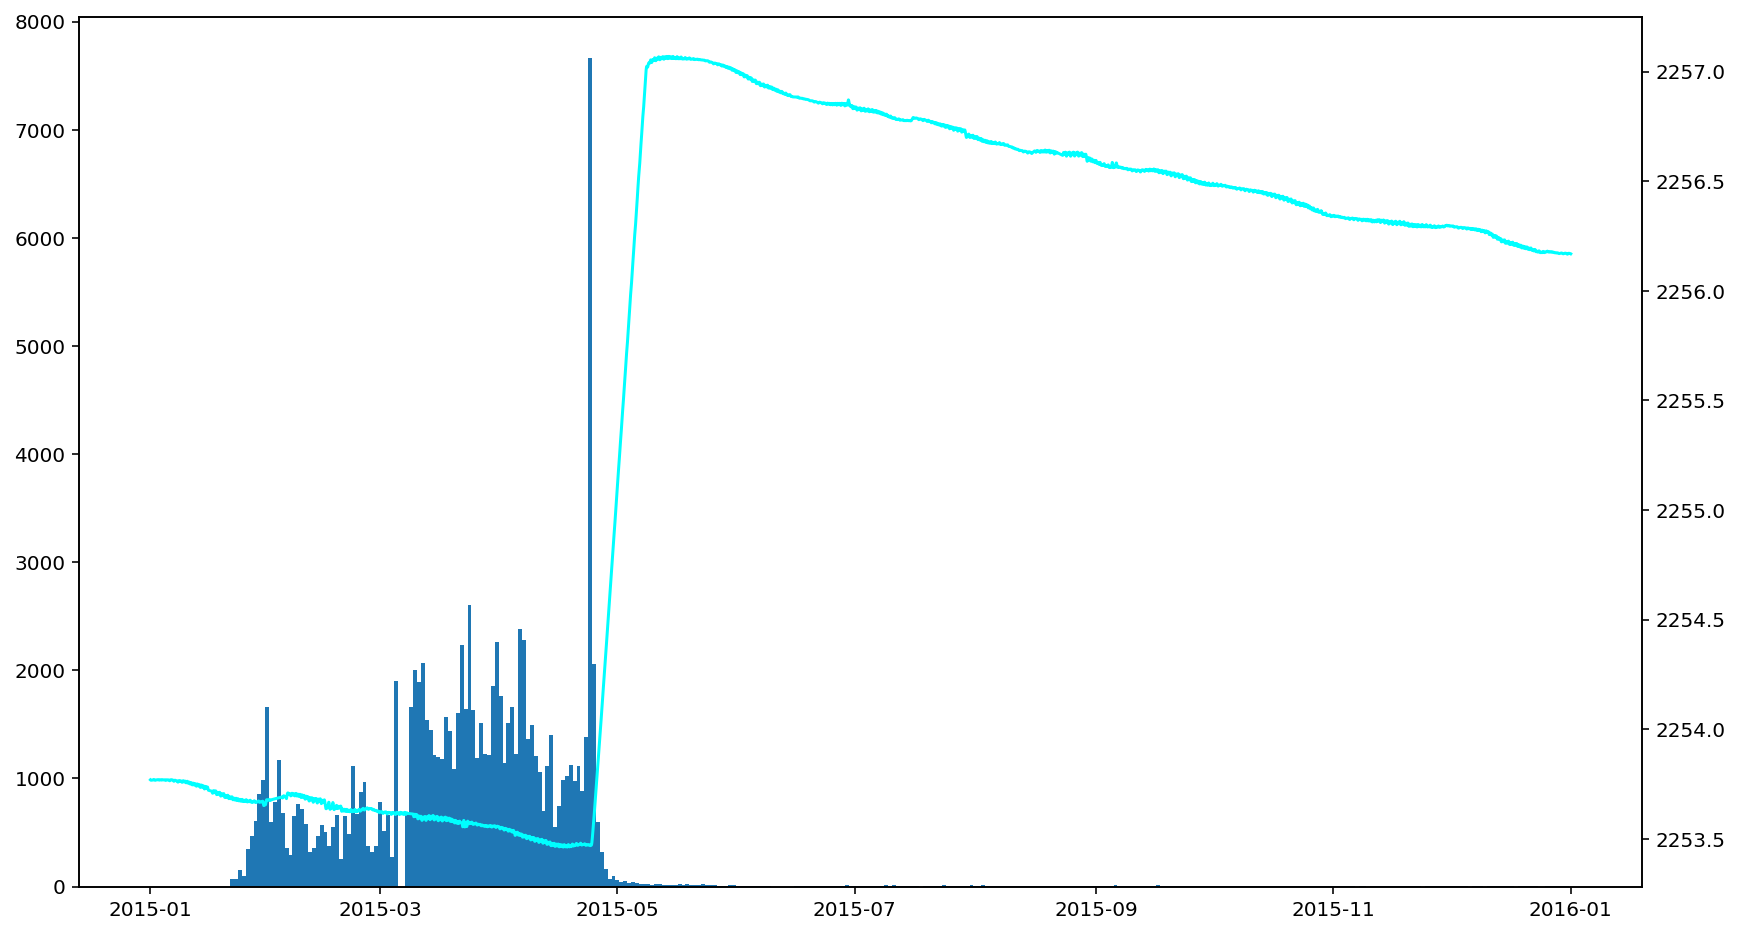

In [73]:
fig, ax1 = plt.subplots()
ax1.bar(daily_count['2015'].index, daily_count['2015'].values, width=1)
ax2 = ax1.twinx()
ax2.plot(botpt_rolling['2015'], color='cyan')

### Mapping eq data
Let's make some maps just because we can.

In [74]:
import cartopy.crs as ccrs
import cartopy
import numpy as np

In [75]:
caldera = pd.read_csv('caldera.csv')

In [76]:
caldera.head()

,lon,lat
0,-130.004786,45.920776
1,-130.010476,45.923824
2,-130.018882,45.935191
3,-130.023946,45.941224
4,-130.028719,45.949881


In [83]:
now = pd.Timestamp('now')
eqs_sub = eqs[now-pd.Timedelta(weeks=2):]

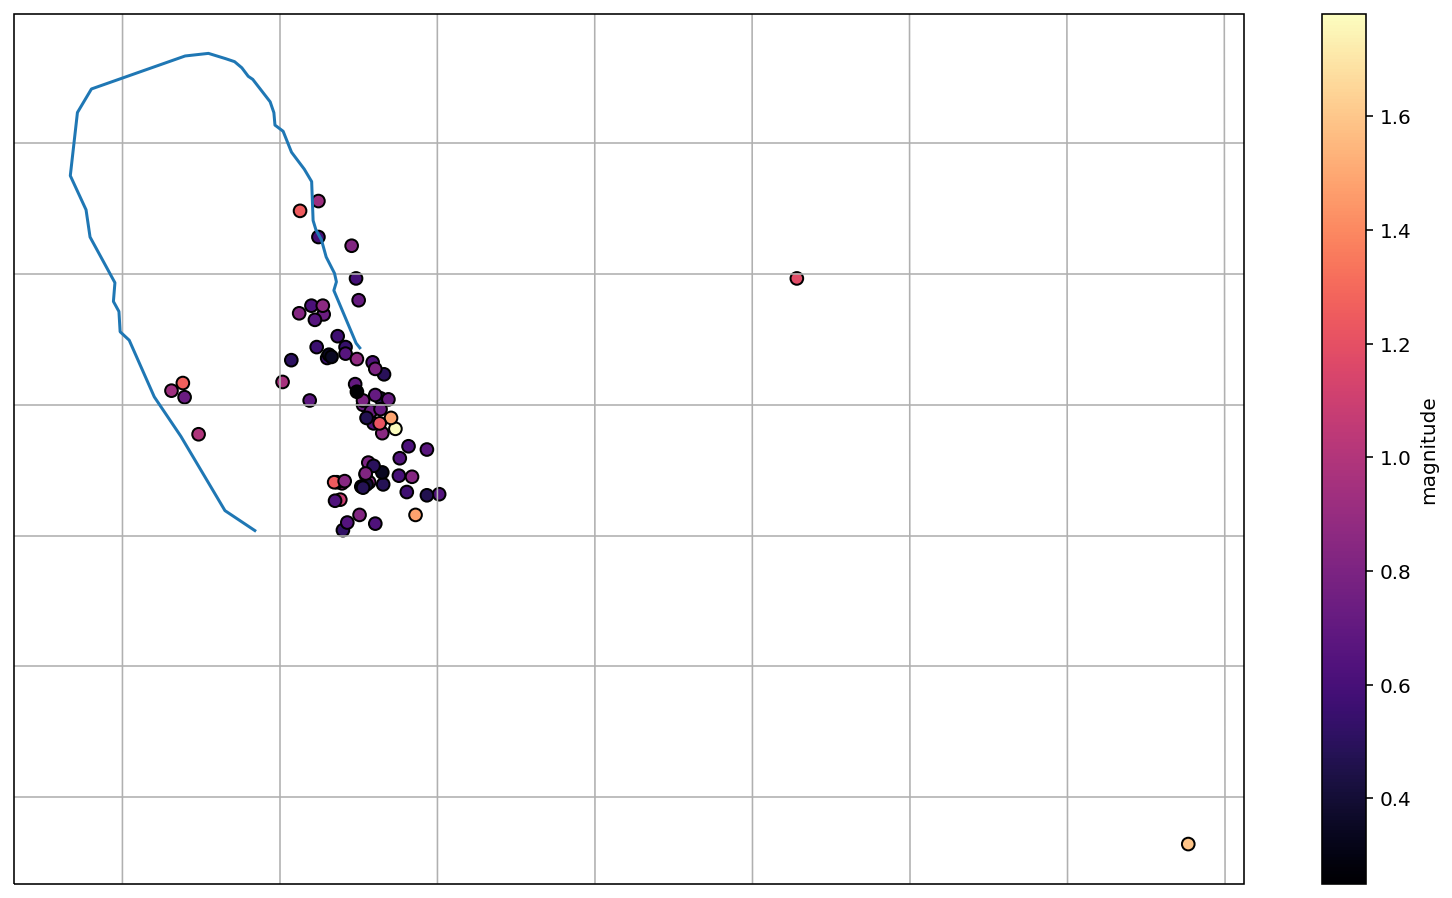

In [85]:
ax = plt.axes(projection = ccrs.Robinson(central_longitude=-130))
ax.plot(caldera.lon, caldera.lat, transform=ccrs.Geodetic())
ax.gridlines()

sc = ax.scatter(eqs_sub.lon, eqs_sub.lat, c=eqs_sub.mw, transform=ccrs.PlateCarree(),
               cmap='magma', edgecolor='k', s=40)
plt.colorbar(sc, label='magnitude')

## OOI Seafloor Camera Data
Now let's look at some video data from the [OOI Seafloor Camera](https://oceanobservatories.org/instrument-class/camhd/) system deployed at Axial Volcano on the Juan de Fuca Ridge. We will make use of the [Pycamhd](https://github.com/tjcrone/pycamhd) library, which can be used to extract frames from the ProRes encoded Quicktime files. These data are hosted on Microsoft's [Azure Open Datasets](https://azure.microsoft.com/en-us/services/open-datasets/).

In [ ]:
dbcamhd_url = 'https://ooiopendata.blob.core.windows.net/camhd/dbcamhd.json'

In [ ]:
def show_image(frame_number):
    plt.rc('figure', figsize=(12, 6))
    plt.rcParams.update({'font.size': 8})
    frame = camhd.get_frame(mov.url, frame_number)
    fig, ax = plt.subplots();
    im1 = ax.imshow(frame);
    plt.yticks(np.arange(0,1081,270))
    plt.xticks(np.arange(0,1921,480))
    plt.title('Deployment: %s    File: %s    Frame: %s' % (mov.deployment, mov['name'], frame_number));